## Churn Prediction Project

### 1. Data Preparation
  - Download and read the data
  - Look at the data
  - Make column names and values uniform
  - Check if all the columns read correctly
  - Check if the churn variable needs any preparation

In [2180]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2181]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [2182]:
df = pd.read_csv(data)

In [2183]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2184]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [2185]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [2186]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [2187]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [2188]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [2189]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [2190]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [2191]:
df.totalcharges = df.totalcharges.fillna(0)

In [2192]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [2193]:
df.churn = (df.churn == 'yes').astype(int)

### 2. Setting up the validation framework
    - Perform the train/validation/test split with Scikit-Learn

In [2194]:
from sklearn.model_selection import train_test_split

In [2195]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [2196]:
len(df_full_train), len(df_test)

(5634, 1409)

In [2197]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [2198]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [2199]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8879-zkjof,female,0,no,no,41,yes,no,dsl,yes,...,yes,yes,yes,yes,one_year,yes,bank_transfer_(automatic),79.85,3320.75,0
1,0201-mibol,female,1,no,no,66,yes,yes,fiber_optic,yes,...,no,no,yes,yes,two_year,yes,bank_transfer_(automatic),102.40,6471.85,0
2,1600-dilpe,female,0,no,no,12,yes,no,dsl,no,...,no,no,no,no,month-to-month,yes,bank_transfer_(automatic),45.00,524.35,0
3,8601-qacrs,female,0,no,no,5,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,50.60,249.95,1
4,7919-zodzz,female,0,yes,yes,10,yes,no,dsl,no,...,yes,no,no,yes,one_year,yes,mailed_check,65.90,660.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,5130-iekqt,male,1,no,no,25,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,no,mailed_check,105.95,2655.25,1
1405,4452-rohmo,female,0,no,no,15,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.60,331.60,0
1406,6164-haqtx,male,0,no,no,71,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,no,bank_transfer_(automatic),53.95,3888.65,0
1407,3982-dqlus,male,1,yes,yes,65,yes,yes,fiber_optic,yes,...,no,no,no,no,month-to-month,yes,electronic_check,85.75,5688.45,0


In [2200]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [2201]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

### 3. Exploratory Data Analysis (EDA)
- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [2202]:
df_full_train = df_full_train.reset_index(drop=True)

In [2203]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [2204]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [2205]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [2206]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [2207]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [2208]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [2209]:
df_full_train[categorical]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,male,0,yes,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
1,female,0,no,no,yes,no,dsl,yes,yes,yes,yes,no,yes,one_year,no,credit_card_(automatic)
2,male,0,yes,no,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,no,bank_transfer_(automatic)
3,male,0,yes,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,no,electronic_check
4,male,0,no,no,yes,no,dsl,yes,yes,no,yes,yes,no,one_year,no,electronic_check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,male,1,no,no,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic_check
5630,male,0,no,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
5631,male,0,no,no,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check
5632,male,0,no,no,yes,yes,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check


In [2210]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### 4. Feature importance: Churn rate and risk ratio
Feature importance analysis (part of EDA) - identifying which features affect our target variable  
- Churn rate  
- Risk ratio  
- Mutual information

#### Churn rate

In [2211]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [2212]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [2213]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [2214]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [2215]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [2216]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [2217]:
global_churn - churn_partner

np.float64(0.06493474245795922)

In [2218]:
global_churn - churn_no_partner

np.float64(-0.05984095297455855)

In [2219]:
global_churn - churn_male

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


np.float64(0.006754520462819769)

In [2220]:
global_churn - churn_female

np.float64(-0.006855983216553063)

#### Risk ratio

In [2221]:
churn_no_partner / global_churn

np.float64(1.2216593879412643)

In [2222]:
churn_partner / global_churn

np.float64(0.7594724924338315)

```sql
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn As diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;

In [2223]:
from IPython.display import display

In [2224]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


### 5. Feature importance: Mutual information
Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another. In this project, it's a way to measure the importance of categorical variables.
    - https://en.wikipedia.org/wiki/Mutual_information

In [2225]:
from sklearn.metrics import mutual_info_score

In [2226]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

np.float64(0.0983203874041556)

In [2227]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

np.float64(0.0001174846211139946)

In [2228]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

np.float64(0.0983203874041556)

In [2229]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

np.float64(0.009967689095399745)

In [2230]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [2231]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### 6. Feature importance: Correlation
Calculating the importance of numerical variables by using correlation coefficient

In [2232]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [2233]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [2234]:
df_full_train[df_full_train.tenure > 2].churn.mean()

np.float64(0.22478269658378816)

In [2235]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [2236]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

In [2237]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [2238]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [2239]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

In [2240]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

### 7. One-hot encoding
- Using Scikit-Learn to encode categorical features

In [2241]:
from sklearn.feature_extraction import DictVectorizer

##### Put all variables into a dictionary

In [2242]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [2243]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

##### Fit a dictionary vectorizer to teach the vectorizer what kind of values are present

In [2244]:
dv = DictVectorizer(sparse=False)

##### Get the dictionaries and transform them into a feature matrix that will be used for training

In [2245]:
X_train = dv.fit_transform(train_dicts)

##### ...then do the same with validation dataset, and apply the transform function to get the feature matrix

In [2246]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [2247]:
X_val = dv.transform(val_dicts)

### 8. Logistic Regression
- Binary classification
- Linear vs logistic regression

In [2248]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

In [2249]:
z = np.linspace(-7, 7, 51)

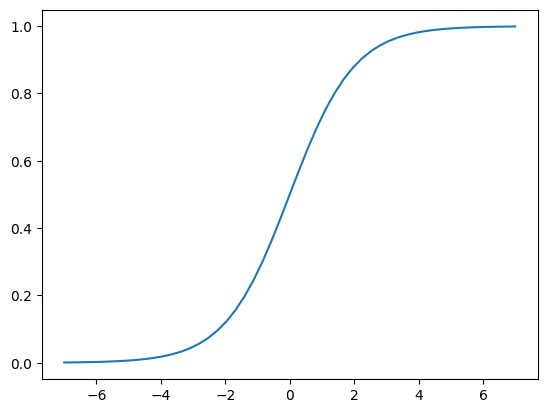

In [2250]:
plt.plot(z, sigmoid(z))

In [2251]:
def linear_regression(xi):
    result = w0

    for  j in range(len(w)):
        result = result + xi[j] * w[j]

    return result

In [2252]:
def logistic_regression(xi):
    score = w0

    for  j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

### 9. Training logistic regression with Scikit-Learn
- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [2253]:
from sklearn.linear_model import LogisticRegression

In [2254]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [2255]:
model.intercept_[0]

np.float64(-0.12193448146460852)

In [2256]:
model.coef_[0].round(3)

array([ 0.607, -0.058, -0.671, -0.028, -0.094,  0.052, -0.103, -0.071,
       -0.042, -0.08 , -0.376,  0.357, -0.103,  0.002, -0.248,  0.133,
       -0.008,  0.057, -0.103, -0.076,  0.217, -0.103, -0.236, -0.249,
        0.127, -0.116, -0.006, -0.101, -0.049,  0.067, -0.04 ,  0.133,
       -0.255,  0.199, -0.101, -0.103,  0.082, -0.064, -0.103,  0.045,
        0.17 , -0.103, -0.189, -0.067,  0.   ])

In [2257]:
model.predict(X_train)  #Hard predictions of churn values

array([0, 1, 1, ..., 1, 0, 1])

In [2258]:
model.predict_proba(X_train) #Soft predictions, two dimensional matrix...the right column is the probability of churning.

array([[0.92153525, 0.07846475],
       [0.32154188, 0.67845812],
       [0.3681008 , 0.6318992 ],
       ...,
       [0.48984332, 0.51015668],
       [0.97233167, 0.02766833],
       [0.29778641, 0.70221359]])

#### Apply the trained model to the validation dataset

In [2259]:
y_pred = model.predict_proba(X_val)[:, 1]

In [2260]:
churn_decision = (y_pred >= 0.5)

In [2261]:
churn_decision

array([False, False, False, ..., False,  True,  True])

In [2262]:
df_val[churn_decision].customerid

2504    8433-wxgna
4597    3440-jpscl
5591    7228-omtpn
4482    6711-fldfb
3610    2612-ranwt
           ...    
2611    5976-jcjrh
4211    2034-cgrhz
3999    5276-kqwhg
6240    6521-yytyi
5282    3049-solay
Name: customerid, Length: 312, dtype: object

#### Evaluating model accuracy

In [2263]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [2264]:
(y_val == churn_decision).mean()

np.float64(0.8055358410220014)

#####  Digging deeper into `y_val == `churn_decision`

In [2265]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [2266]:
df_pred

,probability,prediction,actual
0,0.007359,0,0
1,0.209721,0,0
2,0.220708,0,0
3,0.575035,1,1
4,0.216671,0,0
...,...,...,...
1404,0.295302,0,0
1405,0.040019,0,1
1406,0.148880,0,0
1407,0.784839,1,1


In [2267]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [2268]:
df_pred

,probability,prediction,actual,correct
0,0.007359,0,0,True
1,0.209721,0,0,True
2,0.220708,0,0,True
3,0.575035,1,1,True
4,0.216671,0,0,True
...,...,...,...,...
1404,0.295302,0,0,True
1405,0.040019,0,1,False
1406,0.148880,0,0,True
1407,0.784839,1,1,True


In [2269]:
df_pred.correct

0        True
1        True
2        True
3        True
4        True
        ...  
1404     True
1405    False
1406     True
1407     True
1408     True
Name: correct, Length: 1409, dtype: bool

In [2270]:
df_pred.correct.mean()

np.float64(0.8055358410220014)

In [2271]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

### 10. Model Interpretation
- Look at the coefficients
- Train a similar model with fewer features

In [2272]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [2273]:
model.coef_[0].round(3)

array([ 0.607, -0.058, -0.671, -0.028, -0.094,  0.052, -0.103, -0.071,
       -0.042, -0.08 , -0.376,  0.357, -0.103,  0.002, -0.248,  0.133,
       -0.008,  0.057, -0.103, -0.076,  0.217, -0.103, -0.236, -0.249,
        0.127, -0.116, -0.006, -0.101, -0.049,  0.067, -0.04 ,  0.133,
       -0.255,  0.199, -0.101, -0.103,  0.082, -0.064, -0.103,  0.045,
        0.17 , -0.103, -0.189, -0.067,  0.   ])

In [2274]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.607),
 'contract=one_year': np.float64(-0.058),
 'contract=two_year': np.float64(-0.671),
 'dependents=no': np.float64(-0.028),
 'dependents=yes': np.float64(-0.094),
 'deviceprotection=no': np.float64(0.052),
 'deviceprotection=no_internet_service': np.float64(-0.103),
 'deviceprotection=yes': np.float64(-0.071),
 'gender=female': np.float64(-0.042),
 'gender=male': np.float64(-0.08),
 'internetservice=dsl': np.float64(-0.376),
 'internetservice=fiber_optic': np.float64(0.357),
 'internetservice=no': np.float64(-0.103),
 'monthlycharges': np.float64(0.002),
 'multiplelines=no': np.float64(-0.248),
 'multiplelines=no_phone_service': np.float64(0.133),
 'multiplelines=yes': np.float64(-0.008),
 'onlinebackup=no': np.float64(0.057),
 'onlinebackup=no_internet_service': np.float64(-0.103),
 'onlinebackup=yes': np.float64(-0.076),
 'onlinesecurity=no': np.float64(0.217),
 'onlinesecurity=no_internet_service': np.float64(-0.103),
 'onlinesecurity=yes

##### Train a smaller model

In [2275]:
small = ['contract', 'tenure', 'monthlycharges'] 

In [2276]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [2277]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [2278]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [2279]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [2280]:
X_train_small = dv_small.transform(dicts_train_small)

In [2281]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [2282]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.4779575969847394)

In [2283]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [2284]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

##### The trained model becomes

-2.48 + `contract` (`monthly` 0.971 - `1 year` 0.024  - 0.948 `2 years`) + `monthly charges` 0.027 - `tenure` 0.036

##### So, a customer with a `monthly` contract, pays `$50` and has been with the company for `5 months`  will have the following equation

-2.48 + `contract` (`1` * 0.971) + `$50` 0.027 - `5` * 0.036

In [2285]:
sigmoid(-2.48)  #the prob. that someone without other features will leave the company is ~8%

np.float64(0.07727220213665989)

In [2286]:
sigmoid(-2.48 + 0.97 + (50 * 0.027) - (5 * 0.036))

np.float64(0.4158094770645927)

#### Therefore, the probability that the hypothetical customer will churn is approx. `42%`

In [2287]:
-2.48 + 0.97 + (50 * 0.027) - (5 * 0.036)

-0.3399999999999999

In [2288]:
sigmoid(_)

np.float64(0.4158094770645927)

### 11. Using the model

In [2289]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [2290]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [2291]:
y_full_train = df_full_train.churn.values

In [2293]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_full_train, y_full_train)

LogisticRegression(random_state=1, solver='liblinear')

In [2294]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [2295]:
X_test = dv.transform(dicts_test)

In [2296]:
y_pred = model.predict_proba(X_test)[:, 1]

In [2299]:
churn_decision = y_pred >= 0.5

In [2300]:
(churn_decision  == y_test).mean()

np.float64(0.8126330731014905)

#### ...using the model to predict churn for a hypothetical customer

In [2317]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [2318]:
X_small = dv.transform([customer])

In [2314]:
model.predict_proba(X_small)[0, 1]

np.float64(0.6434116900130904)

In [2319]:
y_test[10]

np.int64(0)

#### The churn value of customer 10 is 0 but the predicted value implies that they not likely to churn, given the threshold value of approx. 0.5...after all, the model isn't perfect

#### ...for another hypothetical customer

In [2320]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [2321]:
X_small = dv.transform([customer])

In [2322]:
model.predict_proba(X_small)[0, 1]

np.float64(0.6434116900130904)

In [2323]:
y_test[-1]

np.int64(1)

#### This time, the model correctly predicts that the customer is likely to churn since the propability of churning is `64%`, greater than the threshold value of `50%`. This matches the churn value of the customer in the dataset, `1`. So, a promotional email could be sent to the customer to remain with the company. 

## Summary
- Feature importance - risk, mutual information, correlation
- One-hot encoding can be implemented with `DicVectorizer`
- Logistic regression - linear model like linear regression
- Output of log reg - probability
- Interpretation of weights is similar to linear regression